# Libraries and datasets

In [10]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [11]:
births = pd.read_csv('../data/raw/Cleaned_data_set.csv')

In [12]:
births_nou = births.loc[births['admit_NICU'] != 'U']

In [3]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_

# Visualizations


### Mother's BMI

In [48]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0,19.0, 25.0,30.0,35.0,40.0,90.0], labels = ['u','h','o','ob1','ob2','ob3'])

## Mother's Age

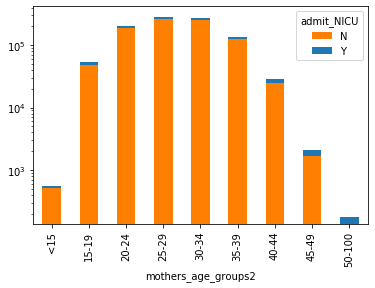

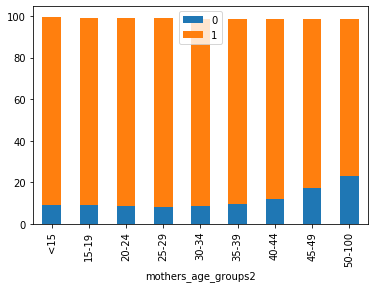

In [86]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

## Prior-termination births

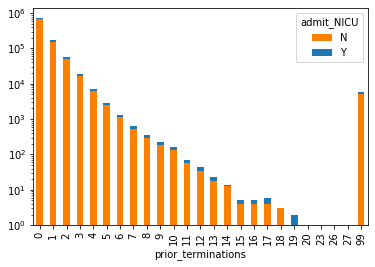

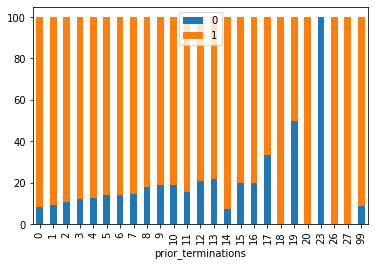

In [90]:
pter_plt = births_nou.groupby(['prior_terminations'])['admit_NICU'].value_counts().unstack()
pter_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_terminations')

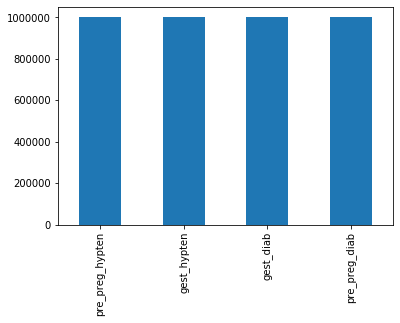

In [19]:
lst = births[['pre_preg_hypten', 'gest_hypten', 'gest_diab', 'pre_preg_diab']].count()
# bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
# bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
# pct_bplot(births,'mothers_age_groups2')
lst.plot(kind = 'bar')

In [13]:
def make_pctdf(dataframe = births_nou, group = str, target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(births[group] == 'Y')].groupby([group])[[target]].count()
    df2 = births_nou.loc[(births[group] == 'Y')].groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    return pct_df.T



ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

           0          1
Y  12.832440  87.167560
Y  27.694104  72.305896
Y  19.331022  80.668978
Y  21.028225  78.971775


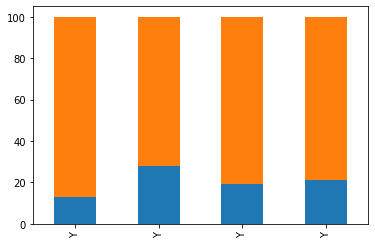

In [14]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
print(test)
test.plot(kind = 'bar', stacked = True, legend = False)

           0          1
Y  12.832440  87.167560
Y  27.694104  72.305896
0.8
0.12832440084942867
0.8
0.2769410391126679
0.8
0.8716755991505714
0.8
0.7230589608873321


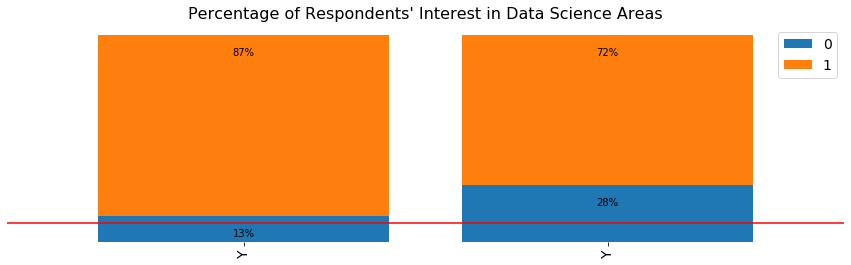

In [30]:
test1 = make_pctdf(births_nou,'gest_diab')
test2 = make_pctdf(births_nou, 'pre_preg_diab')
test3 = pd.concat([test1,test2], axis =0)
print(test3)
#test3.plot(kind = 'bar', stacked = True, legend = False)

# colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (test3.div(test3.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,stacked=True)#,color = colors_list,edgecolor=None)
plt.legend(labels=test3.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

plt.axhline(y=.0914, color='r', linestyle='-', label = '9%')
# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height - 0.1), ha = 'center')
    


Text(0.5, 1.0, "Mother's health factors resulting NICU admittance rates")

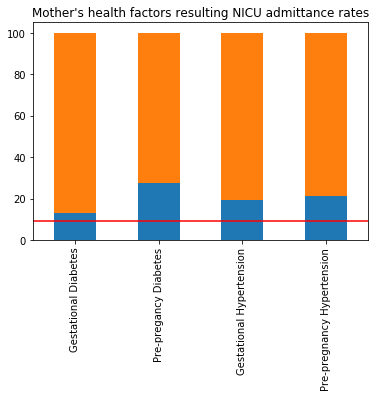

In [70]:
test_plt = test.plot(kind = 'bar', stacked = True, legend = False)
plt.axhline(y=9.14, color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(('Gestational Diabetes', "Pre-pregancy Diabetes", 'Gestational Hypertension', 'Pre-pregnancy Hypertension'))
test_plt.set_title("Mother's health factors resulting NICU admittance rates")

# ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

# viol_plot = viol_counts[:10].plot(kind='bar')

# viol_plot.set_ylabel('No. of Violations')
# viol_plot.set_title('Audit Results')
# viol_plot.set_xticks(ind+width)
# viol_plot.set_xticklabels( ('A', 'B','C') )


In [ ]:

def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True)

In [87]:
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_